!pip install midiutil

!pip install pygame

!pip install pretty_midi

In [ ]:
import sonify
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from midiutil import MIDIFile

In [ ]:
from importlib import reload
reload(sonify)

In [4]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") 
dataMETA = pd.read_csv("data/plasticc_train_metadata.csv.gz")


In [5]:
snFilt = dataMETA["true_target"].isin([62])#31601139
allSNIBC = dataMETA[snFilt]
print(allSNIBC.shape[0])

484


In [6]:
idSNIBC = allSNIBC['object_id'].to_list()

In [7]:
filtData = data["object_id"].isin(idSNIBC)

In [8]:
SNIBCinData = data[filtData]
SNIBCinData

,object_id,mjd,passband,flux,flux_err,detected_bool
6952,3910,59770.3662,2,1.109006,0.622783,0
6953,3910,59770.3740,1,0.442257,0.607388,0
6954,3910,59770.3817,3,0.023326,1.054616,0
6955,3910,59770.3928,4,1.594929,1.811467,0
6956,3910,59770.4039,5,-3.879897,4.619686,0
...,...,...,...,...,...,...
1420167,130639669,60656.3398,5,3.597021,24.716265,0
1420168,130639669,60662.2603,5,14.210534,15.460384,0
1420169,130639669,60665.2812,3,-1.461512,6.398547,0
1420170,130639669,60668.3474,4,28.735235,13.427493,0


In [ ]:
#middleFilt = SNIBCinData['mjd'].between(59900, 60100, inclusive=True)
#middleData = SNIBCinData[middleFilt]
#
#middleUniq = middleData["object_id"].unique()
#print(middleUniq.shape[0])
#middleData

In [82]:
def plotObject(objectID, x0=None, x1=None, y0=None, y1=None):
    objData = SNIBCinData["object_id"].isin([objectID])
    objFiltered = SNIBCinData[objData]
    timeValue = objFiltered["mjd"]
    fluxValue = objFiltered["flux"]
    plt.figure(figsize=(10, 3))
    plt.plot(timeValue, fluxValue, 'o', color = "black")
    if not (x0 is None) and not (x1 is None):
        plt.xlim(x0,x1)
    if not (y0 is None) and not (y1 is None):
        plt.ylim(y0,y1)

In [46]:
def multiPlotObject(objectID):
    plt.figure(figsize=(10, 3))
    ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
    for i in range(6):
        objData = SNIBCinData["object_id"].isin([objectID])
        objFiltered = SNIBCinData[objData]

        objPfilt = objFiltered["passband"].isin([i])
        objP = objFiltered[objPfilt]
        timeValue = objP["mjd"]
        fluxValue = objP["flux"]
        plt.plot(timeValue,fluxValue, 'o', color = ugrizyC[i])
    plt.title("ugrizy")
    plt.xlabel("Time (MJD)")
    plt.ylabel("Flux")

In [39]:
def sonification(objectID):

    objData = SNIBCinData["object_id"].isin([objectID])
    objFiltered = SNIBCinData[objData]
    timeValue = objFiltered["mjd"]
    fluxValue = objFiltered["flux"]


    x_points = timeValue
    y_points = fluxValue
    low_note=20
    high_note=100
    normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
    normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
            
    normed_data = list(zip(normalized_x, normalized_y))
    sonify.play_midi_from_data(normed_data, track_type='single', key='c_major')



In [91]:
def multiSonification(objectID):
    multiData = []
    for i in range(6):
        objData = SNIBCinData["object_id"].isin([objectID])
        objFiltered = SNIBCinData[objData]
        objPfilt = objFiltered["passband"].isin([i])
        objP = objFiltered[objPfilt]
        timeValue = objP["mjd"]
        fluxValue = objP["flux"]
        scaled_x = sonify.scale_list_to_range(timeValue, new_min=0, new_max=30)
        scaled_y = sonify.scale_list_to_range(fluxValue, new_min=0, new_max=30)
        quantized_x = sonify.quantize_x_value(scaled_x)
        multiData.append(list(zip(quantized_x, scaled_y)))
    
    instruments_to_add = [
    'steel drums', 'rock organ', 'pizzicato strings', 'oboe', 'ocarina','violin'
    ]
    multiDataWIntsruments = []
    for index, track in enumerate(multiData):
        multiDataWIntsruments.append([instruments_to_add[index]] + track)
    
    sonify.play_midi_from_data(multiDataWIntsruments, track_type='multiple', key='c_major')



In [10]:
newList = []

for i in range(len(idSNIBC)):
    objData = SNIBCinData["object_id"].isin([idSNIBC[i]])
    obj = SNIBCinData[objData]



    idObj = obj["object_id"].values[0]
    maxFluxRow = obj["flux"].argmax()
    maxFlux = obj["flux"].values[maxFluxRow]

    gap = obj.loc[(obj['mjd'] >= 59900) & (obj['mjd'] <= 60100)]
    
    if gap.isin([maxFlux]).any().any() == True:
        newList.append(idObj)
        #print("object_id is: " + str(idObj))
        #print("max flux value is: " + str(maxFlux))
        #print("This object's max flux is within the middle observation period")
print(len(newList))
newList

87


[42118,
 56987,
 60350,
 62908,
 77192,
 77292,
 90534,
 95369,
 108021,
 119647,
 146429,
 152756,
 183932,
 190161,
 203294,
 232308,
 240999,
 257906,
 275987,
 287556,
 1879121,
 4521595,
 5515915,
 5648366,
 5884968,
 7189244,
 7224451,
 7233276,
 10438407,
 14018328,
 16979142,
 18669959,
 19850495,
 19916824,
 23711290,
 24029393,
 25576261,
 27570837,
 28016462,
 45790897,
 45895017,
 47166952,
 47726502,
 48670802,
 51139333,
 51398857,
 54292335,
 55222930,
 56990554,
 59755963,
 60717845,
 63730187,
 65963501,
 67968147,
 68873934,
 70185284,
 71299170,
 74994691,
 77329655,
 78373800,
 78697085,
 78927046,
 79052637,
 79333412,
 80301338,
 81950128,
 83278224,
 87383717,
 90768535,
 93866109,
 94488708,
 95450752,
 97130922,
 97614844,
 97766291,
 98462441,
 98840050,
 100874766,
 105309744,
 105425239,
 113941323,
 119178558,
 121577984,
 125438948,
 127097212,
 128238629,
 130639669]

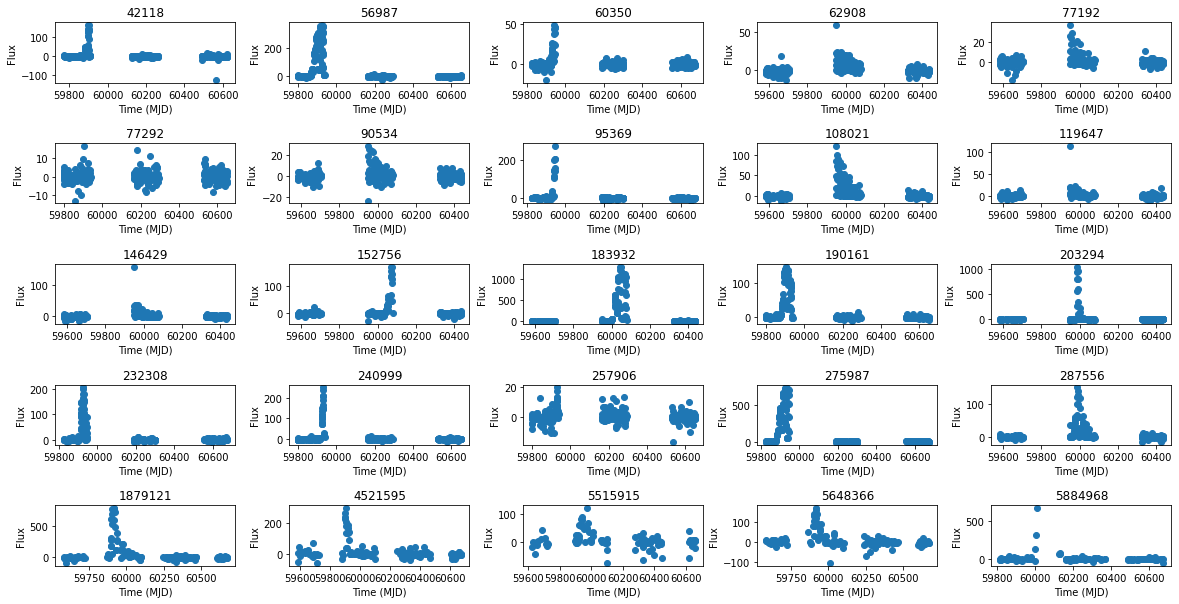

In [22]:
f, ax = plt.subplots(5,5, figsize=(20,10))
f.subplots_adjust(wspace=0.3)
f.subplots_adjust(hspace=1)
ax = ax.flatten()

for i in range(25):
    objPlotF = SNIBCinData["object_id"].isin([newList[i]])
    objPlot = SNIBCinData[objPlotF]
    timePl = objPlot["mjd"]
    fluxP = objPlot["flux"]
    ax[i].set_xlabel("Time (MJD)")
    ax[i].set_ylabel("Flux")
    ax[i].set_title(str(newList[i]))
    ax[i].scatter(timeP, fluxP)

In [ ]:
# 43018203, 287556, 119647

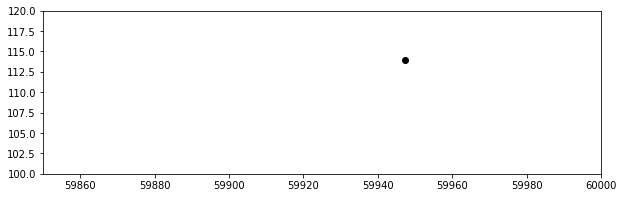

In [86]:
plotObject(119647, x0=59850, x1=60000, y0=100, y1=120)

In [63]:
sonification(287556)

Done playing!


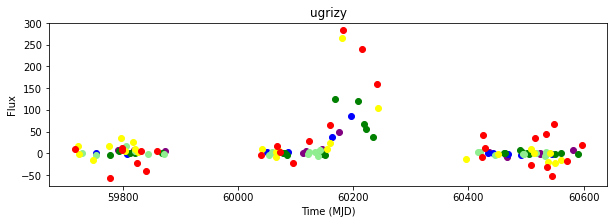

In [93]:
multiPlotObject(43018203)

In [92]:
multiSonification(119647)

Done playing!
